# Basic NN이 '좋은' 모델인 이유


## Perceptron의 한계

$
z(x) = f(w^T ϕ(x))\\
f(y) = \begin{cases}
+1, & \mbox{if }y\mbox{ > 0} \\
-1, & \mbox{if }y\mbox{ ≤ 0}
\end{cases}
$

Basic NN을 이해하기 위해서는 그 전 단계에 해당하는 Perceptron을 먼저 짚고 넘어가야 합니다. Perceptron은 Linear 모델에 분류를 위한 activation 함수를 덮붙인 분류 모델입니다.  

activation은 실상 데이터가 $w^T ϕ(x)$ 위에 있는지 아래에 있는지 확인하는 역할만 하기 때문에 Perceptron은 Linear 분류 모델임을 알 수 있습니다.  

Perceptron의 특징은 데이터가 Linear하게 분리가 될 경우, 반드시 유한한 학습을 통해 그 데이터를 완벽하게 분리할 수 있다는 점입니다. 이를 Perceptron Convergence Theorem이라고 합니다.  

완벽한 분리가 보증된다는 사실은 학술적으로 중요합니다. 그러나 어디까지나 데이터가 선형적으로 분리된다는 가정 하에 그렇다 말이라 Linear하게 분리가 되지 않는 데이터의 경우 Perceptron에는 한계가 있습니다.  

또한, '유한한 학습'은 어디까지나 수학적으로 유한하다는 것이지, 인간 입장에서는 사실상 무한한 경우처럼 느껴질 수 있습니다. 예를 들어, 학습에 300만 년이 걸린다고 해도 이는 유한한 학습입니다. 그러나 인간의 입장에서 300만 년은 오스테랄로피테쿠스가 현대 인류로 진화한 시간과 같습니다.  

## Linear의 한계 $\neq$ NN의 필요성 

보통 NN을 설명하는 글이나 책에서는 Perceptron의 한계를 Xor 이나 비선형적인 산점도로 설명을 하곤 합니다. 모두 Linear의 한계를 잘 보여주는 예시입니다. 그러나 이런 예시는 엄밀히 따지면 왜 NN이 좋은지를 보여주는 예시가 아닙니다.

예를 들어 Xor의 경우, Basic NN이 아닌 모델로도 충분히 분류를 할 수 있습니다. 다음과 같은 분류 모델을 만들어 봅시다.  

$
z(x) = f(sin(θ^T \phi(x)))\\
θ\ =\ [0.6\ ⋅\ π,\ 0.6\ ⋅\ π]^T
$  

이 모델은 $sin$함수의 성질 덕분에 Xor를 분리할 수 있습니다. 뿐만 아니라 임의로 데이터를 무한하게 뿌린다고 해도 적절한 $θ$로 위의 분류 모델은 이를 완벽하게 분리할 수 있습니다. (*Mohri, Mehryar; Rostamizadeh, Afshin; Talwalkar, Ameet (2012). Foundations of Machine Learning*)  
  
단순히 Linear로 인한 한계가 문제라면 위의 분류 모델을 Perceptron 대신 써도 됩니다. 즉, Linear한 한계가 곧 NN의 필요성으로 귀결되지는 않는다는 말입니다.  

그렇다면 우리는 왜 굳이 NN을 써야 할까요? 왜 수많은 분석에서 NN은 그토록 좋은 결과를 내놓는 것일까요?  

우리는 이를 [VC dimension](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension#cite_note-book12-2)이라는 관점으로 한번 생각해볼 수 있습니다.

## VC dimension

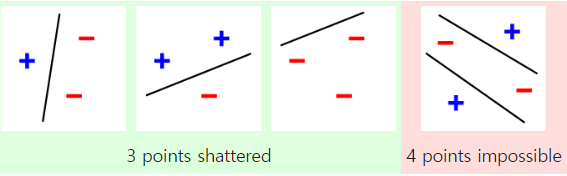

이진 분류 모델 $f$가 주어졌을 때, **$f$의 VC dimension은 $f$가 분류할 수 있는 점의 최대 갯수**입니다. 위의 그림은 Linear한 분류 모델의 경우입니다. 위와 같이 점 4개부터 분류를 할 수 없는 경우가 있기 때문에 Linear한 분류 모델의 VC dimension은 3이 됩니다.(ⓒ WIkipedia)  

앞서 말씀드린 것처럼 $sin$함수를 이용한 분류 모델의 경우, 무한한 점에 대해서도 분류를 할 수 있기 때문에 VC dimension은 $∞$입니다.

우리는 모델의 복잡도를 흔히 feature의 갯수 또는 parameter의 갯수로 이해하곤 합니다. VC dimension 또한 모델의 복잡도와 연관지어서 생각해볼 수 있습니다.

### VC dimension이 낮은 경우 -> Under fitting

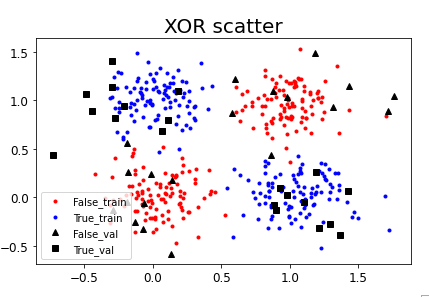

Xor의 예제를 위와 같은 산점도로 다시 한 번 생각해봅시다. 산점도 속의 점은 각 100개씩 총 400개가 있습니다. 검은색 삼각형과 사각형은 validation 역할을 할 점들로 각 10개씩 40개가 있습니다.  

이제 이 산점도 속의 점을 분류하는 모델을 설계한다고 합시다. 먼저 Linear한 분류를 시도해보면 아래와 같은 결과를 볼 수 있습니다.  

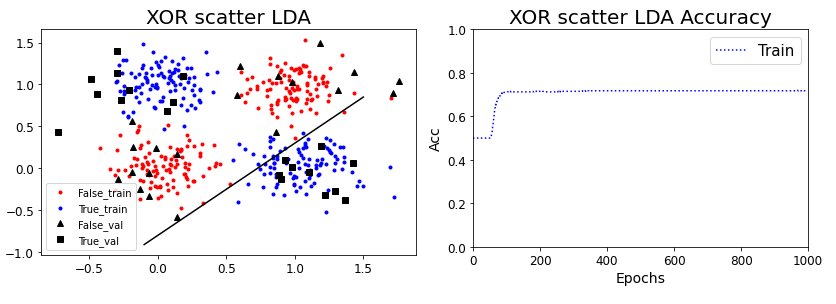

왼쪽 그림에서는 Linear하게 구분이 잘 안 되는 상황을 볼 수 있습니다. 이는 VC dimension과 관계가 있습니다. Linear한 이진 분류기의 VC dimension이 3인데, 실질적으로 분류를 해야 하는 점은 4개이기 때문에 training 단계에서 제대로 학습이 안 되는 걸 볼 수 있습니다.  

오른쪽 그림은 매 epoch에서의 Accuracy를 도표로 나타낸 것입니다. 거의 개선되지 않고 있는 것을 볼 수 있습니다. 이와 같은 상황을 우리는 흔히 Under fitting 되었다고 합니다.

이번에는 반대로 VC dimension이 무한대인 $sin$ 분류 모델을 사용해봅시다. 그 결과는 아래와 같습니다. 

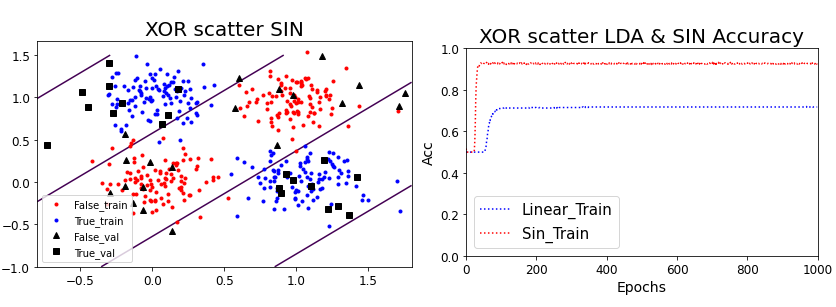

왼쪽 그림에서는 Linear의 경우와 달리 잘 분류되고 있는 것을 볼 수 있습니다. 오른쪽 그림에서도 Linear의 경우보다 정확도가 높은 사실을 확인할 수 있습니다. $sin$ 분류 모델의 VC dimension이 무한대라서 우리가 분류하고 싶은 4개의 점을 충분히 분류할 수 있기 때문입니다. 

이런 맥락에서 $sin$ 분류 모델은 좋은 분류 모델인 거 같습니다. Xor 데이터를 잘 분류했고, 설사 다른 데이터가 주어진다고 해도 VC dimension이 모자랄 일은 없으니 말입니다.  

위의 생각은 과연 사실일지 같이 확인해보도록 합시다.

### VC dimension이 높은 경우 -> Over fitting

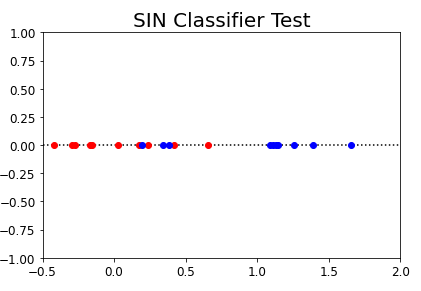

이번에는 위와 같은 데이터를 분류해봅시다. 모든 점은 직선 위에 있고, 보면 직관적으로 알 수 있듯 구분해야 하는 점은 실질적으로 2개인 상황입니다.  

2 또한 $sin$ 분류 모델의 VC dimension보다 적으니 똑같이 좋은 결과가 나올거라 기대하며 학습을 시켜봅시다. 그 결과는 아래와 같습니다. 

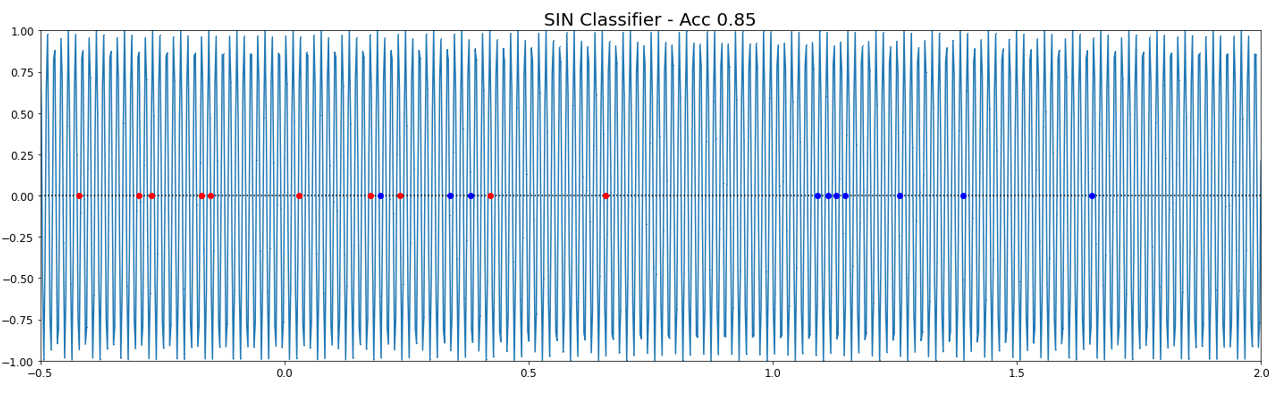